In [4]:
from mlflux.gotm import read
import pandas as pd
from tqdm import tqdm
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from mlflux.utils import save_ds_compressed

%load_ext autoreload
%autoreload 3

### Mixed Layer Depth

#### Density v.s. temperature

/ext3/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


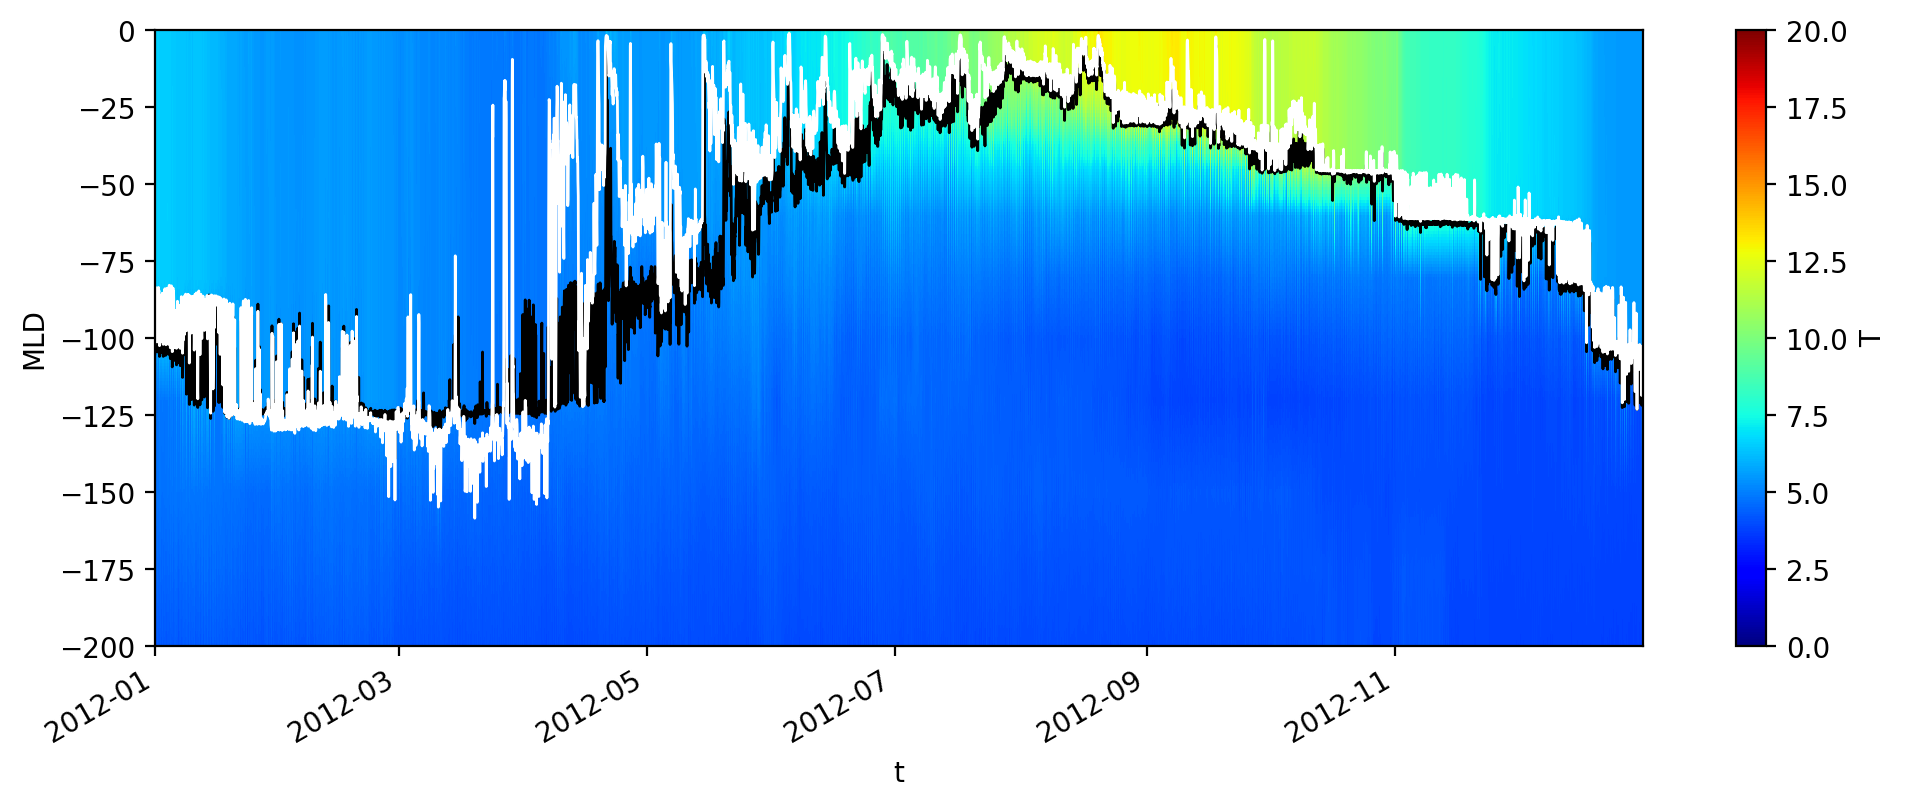

In [6]:
''' Check that MLD looks ok, and temperature and density criteria agree '''

from mlflux.gotm import compute_MLD

folder = '/scratch/jw8736/gotm/shared/'
ds = xr.open_dataset(folder + 'profs.nc')

fig = plt.figure(figsize=[12,4], dpi=200)
vmin=0; vmax=20 

ds.T.sel(t=slice('2012-01-01','2012-12-31')).plot(x='t', cmap='jet', vmin=vmin, vmax=vmax)
ds = compute_MLD(ds,'density')
ds.MLD.sel(t=slice('2012-01-01','2012-12-31')).plot(c='k', lw=1, label='density')
ds = compute_MLD(ds,'temperature')
ds.MLD.sel(t=slice('2012-01-01','2012-12-31')).plot(c='w', lw=1, label='temperature')

#### Comparing with observation

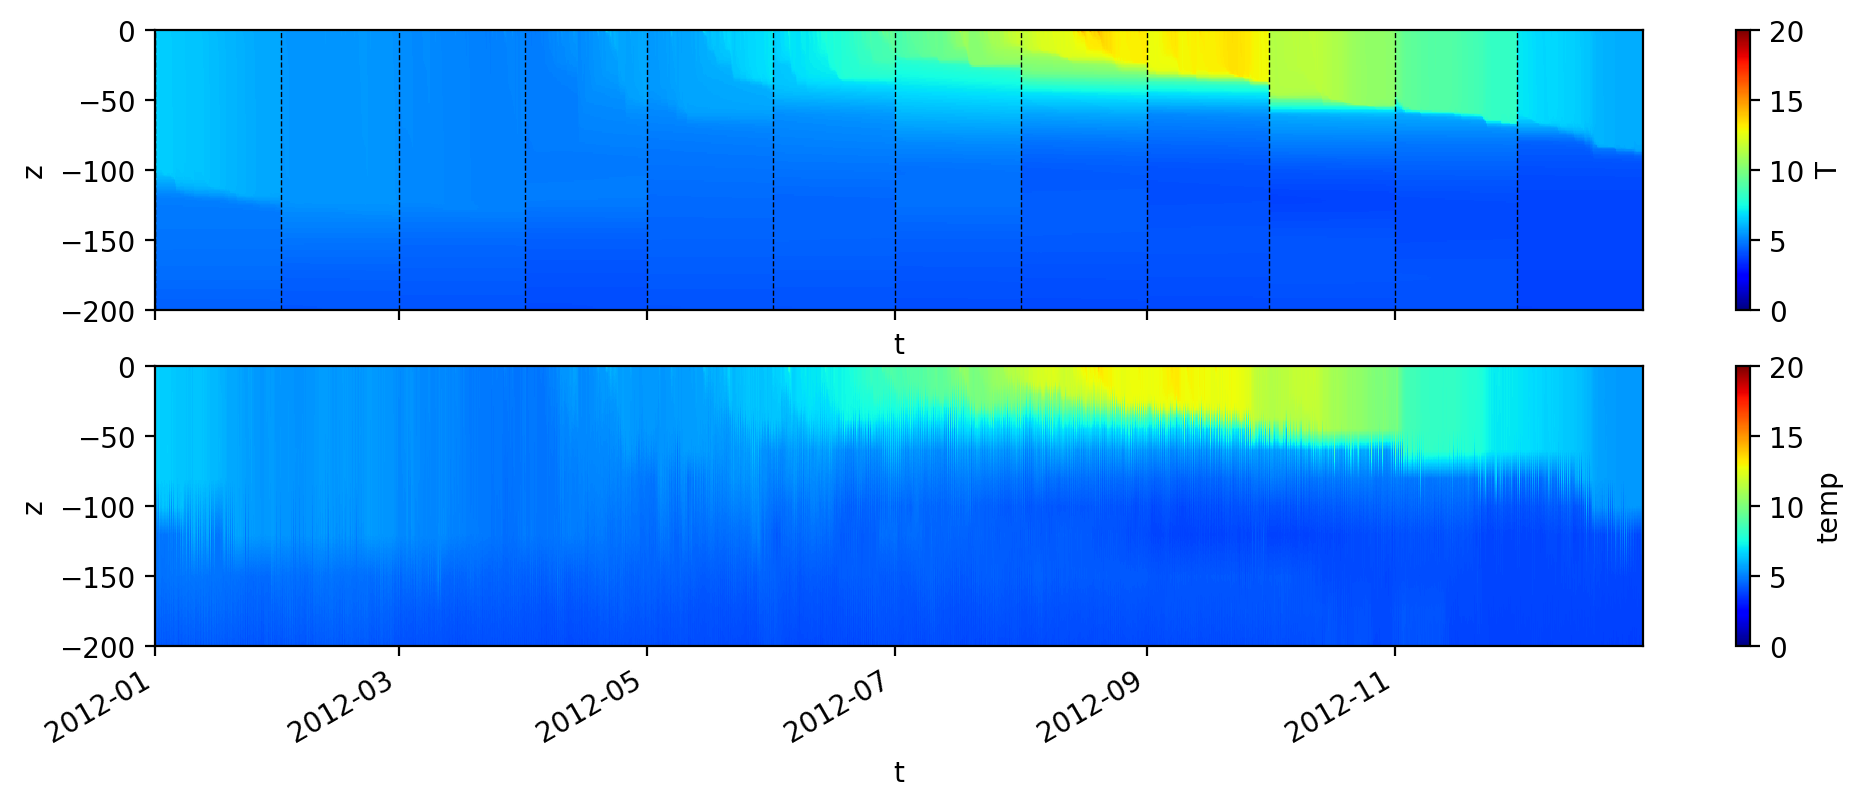

In [45]:
fig, axes = plt.subplots(2, 1, figsize=[12,4], dpi=200, sharex=True)
method = 'kepsilon'
MINUTE = 10
ds = xr.open_dataset(folder+f'{method}_{year}_dt%g.nc' %MINUTE)

vmin=0; vmax=20
ds.T.plot(x='t', cmap='jet', vmin=vmin, vmax=vmax, ax=axes[0])
for i in range(1,13):
    axes[0].axvline(x=pd.Timestamp(year,i,1), ls='--', lw=0.5, c='k')

folder = '/scratch/jw8736/gotm/shared/'
ds = xr.open_dataset(folder + 'tprof.nc')
ds.temp.sel(t=slice('2012-01-01','2012-12-31')).plot(ax=axes[1], x='t', cmap='jet', vmin=vmin, vmax=vmax)


### Checking state variable gap

In [ ]:
# Path
from mlflux.gotm import read2010
path = 'ows_papa/'
df = read2010(path, datetimeformat='%Y-%m-%d %H:%M:%S')
df_ = df.set_index('datetime')
ds = xr.Dataset.from_dataframe(df_)

In [ ]:
dt = ds.datetime.diff(dim='datetime')/6e10
# dt.sel(datetime=slice('2010-01-01','2010-12-31')).plot() # Big gap between May and June
# dt.sel(datetime=slice('2011-01-01','2011-12-31')).plot() # One data point that has 180 minutes step
# dt.sel(datetime=slice('2012-01-01','2012-12-31')).plot() # Some data points that has between 60 to 420 minutes step
# dt.sel(datetime=slice('2013-01-01','2013-12-31')).plot() # Some data points that has between 60 to 420 minutes step
# dt.sel(datetime=slice('2014-01-01','2014-12-31')).plot() # Has really big blank in first half of the year
# dt.sel(datetime=slice('2015-01-01','2015-12-31')).plot() # 60 to 360 minutes gap
# dt.sel(datetime=slice('2016-01-01','2016-12-31')).plot() # 60 to 360 minutes gap
# dt.sel(datetime=slice('2017-01-01','2017-12-31')).plot() # One really big gap in June
# dt.sel(datetime=slice('2018-01-01','2018-12-31')).plot() # One 600 minutes gap in July
# dt.sel(datetime=slice('2019-01-01','2019-12-31')).plot() # One 1400+ minutes gap in March
dt.sel(datetime=slice('2020-01-01','2020-12-31')).plot() # One really big gap from March to August